# PLOTTING UNIFIED JSON

In [1]:

#import data and packages
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
from functions import *
from gis_functions import *
from plot_functions import *


data=geopandas.read_file('final/complete.geojson')


In [2]:
#why do i still  get comma values in legend?
data.sum_PE=data.sum_PE.astype('int')


In [3]:
data.mean_year.max()
data.sort_values('mean_year')
data[data.mean_year==0].BL.unique() ##### all 0s come from steiermark
data[data.mean_year>2020].BL.unique() ### all wrongs come from Salzburg
data[data.mean_year<1800].BL.unique() ### karnten and salzburg has 
data[data.mean_year<1800] ### something very wrong with steiermark years


,id,BL,PE_nonitri,before_reg,freq,mean_year,no_nitri,sum_PE,geometry
1693,452,Kärnten,200.000000,4,5,1630,4,240,"POLYGON ((13.61124 47.01909, 13.61113 47.01917..."
2294,113,Salzburg,28.333333,0,5,1621,4,35,"POLYGON ((13.09795 47.63372, 13.09816 47.63444..."
2387,206,Salzburg,6.666667,0,4,1000,3,22,"POLYGON ((12.97875 47.38090, 12.97804 47.38125..."
2433,252,Salzburg,0.000000,0,8,1753,0,119,"POLYGON ((12.41600 47.28889, 12.41603 47.28908..."


In [ ]:
data.plot()

In [11]:
#prepare basemaps
basemap=geopandas.read_file('DATA/shp_new/Oesterreich_BEV_VGD_LAM.shp')
basemap.KG_NR=basemap.KG_NR.astype(int)
basemap.to_crs(epsg=4326,inplace=True)

#isolate BL
#oebo_base =basemap[basemap.BL.isin(['Oberösterreich','Niederösterreich']) ] # each BL needs own boundary. for BL in list isolate

#unify polygons
#BL=oebo_base.geometry.unary_union
#BL=geopandas.GeoDataFrame(geometry=[BL], crs=oebo_base.crs)


In [ ]:
kwargs={'loc': 'upper left', 'shadow': 'True', 'ncol':2} 
plot(data,basemap,'PE sum per KG','sum_PE', **kwargs)

In [ ]:
plot(data,basemap,'non-nitrifying','no_nitri' )

In [ ]:
#plot for PE
fig,ax=plt.subplots(1,figsize=(20,30))
#basemap.plot(ax=ax, alpha=0.3)
ax.set_title('PE sum per KG', fontsize=15)
data.plot(column='sum_PE',cmap='cividis', ax=ax, legend=True, scheme='EqualInterval', k=10,                          # EqualInterval is good
           legend_kwds={'loc': 'upper left','ncol':2, 'shadow': 'True', 'title': 'PE sum'})                            # cividis good

#plot KG boundaries
#oebo_base.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
#BL.exterior.plot(edgecolor='k', linewidth=1, ax=ax)

#get tot extent of data and zoom in to figure
#minx, miny, maxx, maxy=oebo_base.total_bounds
#ax.set_xlim(minx-0.01,maxx+0.01)
#ax.set_ylim(miny-0.01,maxy+0.01)

#only label first 5 bezirke 
#unify.sort_values('sum_PE', inplace=True, ascending=False)
#unify.head().apply(lambda x: ax.annotate(text=x.KG, xy=x.geometry.centroid.coords[0], ha='center',fontsize='large', fontstyle='oblique', color='black'), axis=1)


In [ ]:
#plot for age
fig,ax=plt.subplots(1,figsize=(20,30))
basemap.plot(ax=ax, alpha=0.3)
data.plot(column='mean_year', ax=ax, legend=True, legend_kwds={ 'orientation':'horizontal'}  )
ax.set_title('Austria: mean age of infrastructure', fontsize=20)



Text(0.5, 1.0, ' % of non nitrifying plants')

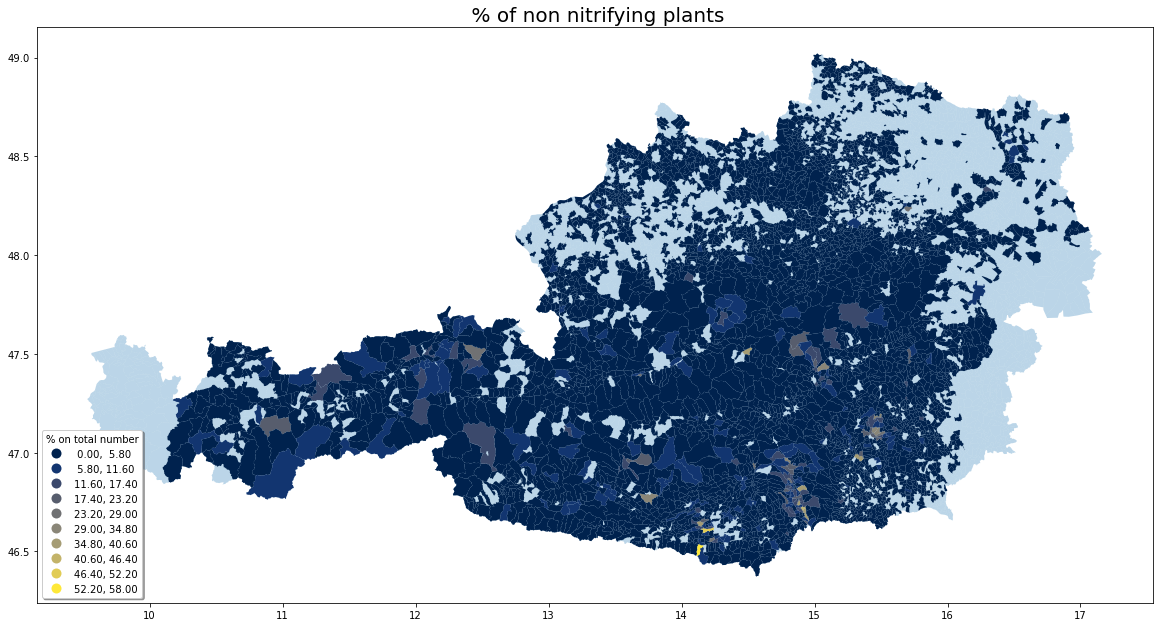

In [13]:
#plot for old infrastructure density. % of non nitrifying palnts per KG
fig,ax=plt.subplots(1,figsize=(20,30))
basemap.plot(ax=ax, alpha=0.3)
data.plot(column='no_nitri', ax=ax,legend=True,scheme='equal_interval',cmap='cividis', k=10, legend_kwds={'loc':'lower left', 'shadow':'True','title':'% on total number'})
ax.set_title(' % of non nitrifying plants', fontsize=20)





In [ ]:
#plot for old infrastructure density. how many have been built before 1991?
fig,ax=plt.subplots(1,figsize=(10,15))
basemap.plot(ax=ax, alpha=0.3)
data.plot(column='%before_reg', ax=ax,legend=True,scheme='equal_interval', k=10, legend_kwds={'loc':'lower left', 'shadow':'True','title':'% on total number'})
ax.set_title(' Built before 1991', fontsize=20)



In [ ]:
fig,ax=plt.subplots(1,2,figsize=(30,20))
basemap.plot(ax=ax[0], alpha=0.3)
basemap.plot(ax=ax[1], alpha=0.3)


ax[0].set_title(' % of non nitrifying plants', fontsize=15)
data.plot(column='%no_nitri', ax=ax[0],legend=True,scheme='equal_interval', k=10, legend_kwds={'loc':'lower left', 'shadow':'True','title':'% on total number'})


#plot 2
ax[1].set_title('Infrastructure density per KG', fontsize=15)
data.plot(column='freq', ax=ax[1],legend=True,scheme='equal_interval', k=10, legend_kwds={'loc':'lower left', 'shadow':'True','title':'count'})


there is unexpected high number of KG with high % of non-nitifying. compared to infra desnity it is quite unallarming. low density indeed.
hot to make one graph out of these two ?



Text(0.5, 1.0, ' ')

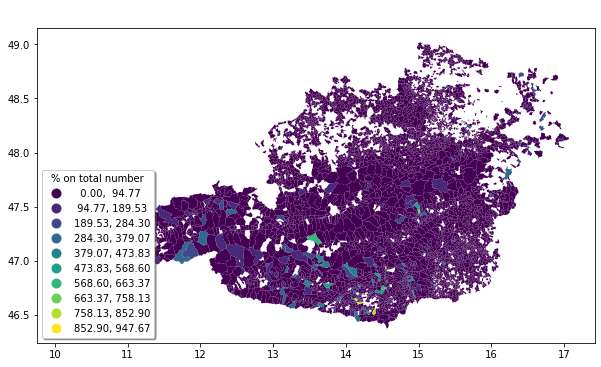

In [9]:
fig,ax=plt.subplots(1,figsize=(10,15))
#basemap.plot(ax=ax, alpha=0.3)
data.plot(column='PE_nonitri', ax=ax,legend=True,scheme='equal_interval', k=10, legend_kwds={'loc':'lower left', 'shadow':'True','title':'% on total number'})
ax.set_title(' ', fontsize=20)
